# Preprocessing

In [1]:
import pandas as pd
import numpy as np


In [2]:
restaurant_df=pd.read_csv('restaurants1.csv')
review_df=pd.read_csv('reviews1.csv')

In [3]:
print(restaurant_df.shape)

(500, 17)


In [4]:
len(restaurant_df['reviews'])!=0

True

In [5]:
restaurant_df=restaurant_df[(restaurant_df['reviews'].apply(lambda x: x !='[]' ))]

In [6]:
restaurant_df.shape

(486, 17)

In [7]:
np.size(restaurant_df['id'].unique())

476

In [8]:
def count_reviews(review_string):
    try:
        # Compter le nombre d'occurrences de la clé 'id' (ou toute autre clé distincte des avis)
        return review_string.count("'user':")
    except:
        # En cas d'erreur, retourner 0 ou NaN
        return 0

# Appliquer cette fonction à la colonne 'reviews' pour créer une nouvelle colonne 'reviews_count'
restaurant_df['reviews_count'] = restaurant_df['reviews'].apply(count_reviews)

restaurant_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,reviews,reviews_count
0,-0iLH7iQNYtoURciDpJf6w,le-comptoir-de-la-gastronomie-paris,Le Comptoir de la Gastronomie,https://s3-media3.fl.yelpcdn.com/bphoto/xT4YkC...,False,https://www.yelp.com/biz/le-comptoir-de-la-gas...,1304,"[{'alias': 'french', 'title': 'French'}]",4.5,"{'latitude': 48.8645157999652, 'longitude': 2....",[],€€,"{'address1': '34 rue Montmartre', 'address2': ...",3.314233e+10,+33 1 42 33 31 32,370.827517,"[{'id': 'sxEFkJ89kyF-wMDUI2ZnWw', 'url': 'http...",3
1,IU9_wVOGBKjfqTTpAXpKcQ,bistro-des-augustins-paris,Bistro des Augustins,https://s3-media2.fl.yelpcdn.com/bphoto/ctHDHM...,False,https://www.yelp.com/biz/bistro-des-augustins-...,486,"[{'alias': 'bistros', 'title': 'Bistros'}, {'a...",4.5,"{'latitude': 48.854754, 'longitude': 2.342119}",[],€€,"{'address1': '39 quai des Grands Augustins', '...",3.314354e+10,+33 1 43 54 04 41,801.117610,"[{'id': 'PJuWhEzKFz3ipwhOcWMMBA', 'url': 'http...",3
2,cEjF41ZQB8-SST8cd3EsEw,l-avant-comptoir-paris-3,L'Avant Comptoir,https://s3-media2.fl.yelpcdn.com/bphoto/V38oU4...,False,https://www.yelp.com/biz/l-avant-comptoir-pari...,657,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...",4.5,"{'latitude': 48.85202, 'longitude': 2.3388}",[],€€,"{'address1': ""3 carrefour de l'Odéon"", 'addres...",3.314238e+10,+33 1 42 38 47 55,1131.333887,"[{'id': 'WiSWp2PnMqvPyNMkH9n-rQ', 'url': 'http...",3
3,BuJnfWI86tTxFUon071EKg,brasserie-bellanger-paris,Brasserie Bellanger,https://s3-media2.fl.yelpcdn.com/bphoto/0IQnl-...,False,https://www.yelp.com/biz/brasserie-bellanger-p...,24,"[{'alias': 'french', 'title': 'French'}]",5.0,"{'latitude': 48.880937, 'longitude': 2.3499401}",[],NaN,{'address1': '140 rue du Faubourg Poissonnière...,3.395401e+10,+33 9 54 00 99 65,2185.842371,"[{'id': 'id68lPNLI6S7aaKhurdHxQ', 'url': 'http...",3
4,ctP4c3mwVO5oOzLI48LtuQ,les-antiquaires-paris,Les Antiquaires,https://s3-media1.fl.yelpcdn.com/bphoto/5NWC7V...,False,https://www.yelp.com/biz/les-antiquaires-paris...,468,"[{'alias': 'bistros', 'title': 'Bistros'}]",4.5,"{'latitude': 48.8580664639432, 'longitude': 2....",[],€€€,"{'address1': '13 rue du Bac', 'address2': '', ...",3.314261e+10,+33 1 42 61 08 36,1105.856028,"[{'id': 'lXP0qW8tHuJa9C0ZIvzhPQ', 'url': 'http...",3


In [9]:
# Supprimer les doublons basés sur 'review_id' s'ils existent
restaurant_df.drop_duplicates(subset='id', inplace=True)

In [10]:
restaurant_df.shape

(476, 18)

In [11]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son in-law & his m...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w


In [12]:
# Supprimer les doublons basés sur 'review_id' s'ils existent
review_df.drop_duplicates(subset='review_id', inplace=True)

In [13]:
review_df.shape

(1393, 6)

In [14]:
review_df['text'] = review_df['text'].str.replace(r"[^a-zA-Z0-9\s.,;']", "", regex=True)

In [15]:
# Supprimer les espaces blancs superflus
review_df['text'] = review_df['text'].str.strip()

In [16]:
# Par exemple, nous pourrions vouloir s'assurer que les ID sont des chaînes de caractères et non des nombres
review_df['business_id'] = review_df['business_id'].astype(str)
review_df['review_id'] = review_df['review_id'].astype(str)

In [17]:
review_df.isna().sum()

business_id     0
review_id       0
text            0
rating          0
time_created    0
user_id         0
dtype: int64

### Correction grammatical et langue

In [18]:
!pip install transformers -U 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("vennify/t5-base-grammar-correction")
model = AutoModelForSeq2SeqLM.from_pretrained("vennify/t5-base-grammar-correction")

c:\Users\sraps\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
from transformers import pipeline

fix_spelling = pipeline("text2text-generation",model="oliverguhr/spelling-correction-english-base")

print(fix_spelling("lets do a comparsion",max_length=2048))


config.json: 100%|██████████| 1.74k/1.74k [00:00<?, ?B/s]
c:\Users\sraps\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sraps\.cache\huggingface\hub\models--oliverguhr--spelling-correction-english-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
model.sa

[{'generated_text': "Let's do a comparison."}]


In [24]:
def correct_grammar(text, tokenizer, model):
    # Ajouter le préfixe requis par T5 pour la tâche de correction grammaticale
    input_text = f"grammar: {text}"

    # Encoder le texte et générer la correction
    inputs = tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)

    # Décoder et retourner la correction
    corrected_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    corrected_text=fix_spelling(corrected_text,max_length=2048)
    return corrected_text

# Exemple d'utilisation
input_sentence = "She don't know what to do, because it was metiocre."
corrected_sentence = correct_grammar(input_sentence, tokenizer, model)
print(f"Original: {input_sentence}\nCorrected: {corrected_sentence}")

Original: She don't know what to do, because it was metiocre.
Corrected: [{'generated_text': "She doesn't know what to do, because it was mediocre."}]


In [25]:
# Appliquer la fonction de correction à chaque avis
review_df['corrected_text'] = review_df['text'].apply(lambda x: correct_grammar(x, tokenizer, model))

In [26]:
review_df[['text', 'corrected_text']].head(10)

,text,corrected_text
0,"Based on the menu presented, one could write a...",[{'generated_text': 'Based on the menu present...
1,I like this place but it does feel a little bi...,"[{'generated_text': 'I like this place, but it..."
2,"If you love French OnIon Soup, this is for you...",[{'generated_text': 'If you love French onion ...
3,"Came here with my daughter, son inlaw his mom...",[{'generated_text': 'Came here with my daughte...
4,This tiny eatery along the Seine on the left b...,[{'generated_text': 'This tiny eatery along th...
5,"The food was AMAZING, I had the vegetarian veg...","[{'generated_text': 'The food was AMAZING, I h..."
6,I'm staying in the area and was sitting at a c...,[{'generated_text': 'I'm staying in the area a...
7,I can't help but share my incredible experienc...,[{'generated_text': 'I can't help but share my...
8,This is an amazing bar style restaurant. The s...,[{'generated_text': 'This is an amazing bar st...
9,"I understand that everyone wants to see food, ...",[{'generated_text': 'I understand that everyon...


In [74]:
#! pip install langdetect transformers


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
review_df.to_csv("reviews.csv", sep=';', index=False)

In [28]:
from langdetect import detect
from transformers import MarianMTModel, MarianTokenizer

def detect_and_translate(text, tokenizer, model):
    # Détection de la langue
    try:
        lang = detect(text)
    except:
        lang = "error"  # en cas d'erreur dans la détection

    # Traduire en anglais si la langue n'est pas l'anglais
    if lang != 'en' and lang != "error":
        # Préparer le texte pour la traduction
        inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True)
        outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)
        text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Charger le tokenizer et le modèle de traduction 
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-es-en")

# Appliquer la fonction à chaque avis
review_df['translated_text'] = review_df['text'].apply(lambda x: detect_and_translate(x, tokenizer, model))

# Afficher les résultats
print(review_df[['text', 'translated_text']].head())

                                                text  \
0  Based on the menu presented, one could write a...   
1  I like this place but it does feel a little bi...   
2  If you love French OnIon Soup, this is for you...   
3  Came here with my daughter, son inlaw  his mom...   
4  This tiny eatery along the Seine on the left b...   

                                     translated_text  
0  Based on the menu presented, one could write a...  
1  I like this place but it does feel a little bi...  
2  If you love French OnIon Soup, this is for you...  
3  Came here with my daughter, son inlaw  his mom...  
4  This tiny eatery along the Seine on the left b...  


In [ ]:
review_df[['text', 'corrected_text','translated_text']].head(10)

In [29]:
review_df.to_csv("reviews_fin.csv", sep=';', index=False)

### Visualisation

In [ ]:
ax = review_df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars',
                                            figsize=(10,5))
ax.set_xlabel('Reviews Star')
plt.show()

### Sentiment analysis des avis en moyenne

In [30]:
#! pip install vaderSentiment

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
# Initialisation de VADER
analyzer = SentimentIntensityAnalyzer()

# Fonction pour obtenir le sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Application de la fonction à chaque avis
review_df['sentiment'] = review_df['corrected_text'].apply(get_sentiment)

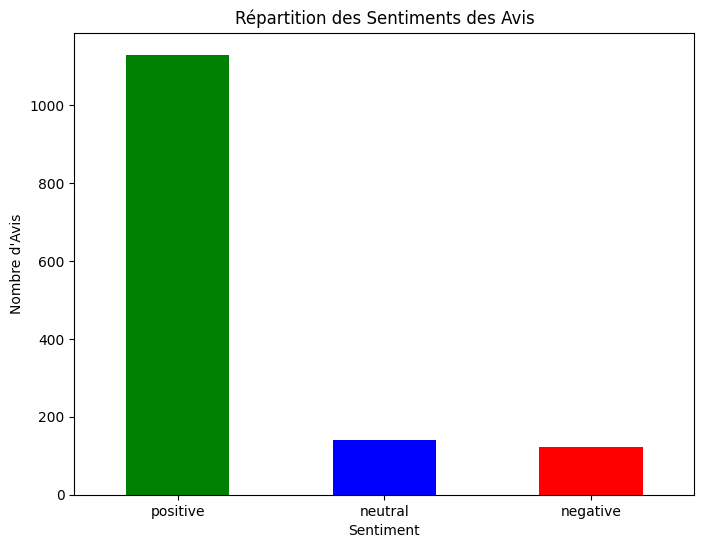

In [82]:
# Compter les sentiments
sentiment_counts = review_df['sentiment'].value_counts()

# Création d'un diagramme à barres
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Répartition des Sentiments des Avis')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'Avis')
plt.xticks(rotation=0)
plt.show()

In [ ]:
if 'label' in review_df.columns and 'sentiment_vader' in review_df.columns:
    # Créer un dictionnaire pour mapper les labels numériques aux étiquettes de sentiment
    label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    review_df['label_mapped'] = review_df['label'].map(label_map)

    # Préparer les données pour la visualisation
    label_counts = review_df['label_mapped'].value_counts()
    vader_counts = review_df['sentiment_vader'].value_counts()

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, label='Labels')
    sns.barplot(x=vader_counts.index, y=vader_counts.values, label='Vader Sentiment', alpha=0.6)
    plt.title("Comparaison entre les labels et le sentiment Vader")
    plt.ylabel("Nombre d'observations")
    plt.legend()
    plt.show()
else:
    print("Les colonnes nécessaires ne sont pas présentes dans le DataFrame.")

In [83]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Créer une pipeline d'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def analyze_sentiment(text):
    # Effectuer l'analyse de sentiment
    result = sentiment_analysis(text)

    # Récupérer le label (POSITIF ou NEGATIF) et le transformer en positif/négatif/neutre
    label = result[0]['label']
    return label

# Appliquer l'analyse de sentiment à chaque avis
review_df['sentiment'] = review_df['translated_text'].apply(analyze_sentiment)

# Afficher les résultats
print(review_df[['translated_text', 'sentiment']].head())


                                     translated_text sentiment
0  Based on the menu presented, one could write a...  positive
1  I like this place but it does feel a little bi...  positive
2  If you love French OnIon Soup, this is for you...  positive
3  Came here with my daughter, son inlaw  his mom...  negative
4  This tiny eatery along the Seine on the left b...  positive


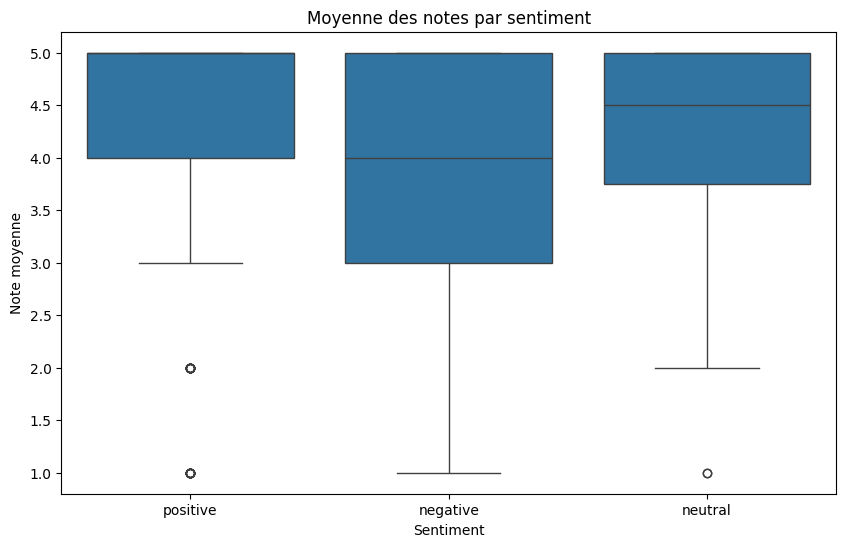

In [85]:
# Création d'un graphique pour visualiser les notes par rapport aux sentiments
plt.figure(figsize=(10, 6))

# Utiliser Seaborn pour créer un diagramme en barres
sns.boxplot(x='sentiment', y='rating', data=review_df)

# Personnaliser le graphique
plt.title('Moyenne des notes par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Note moyenne')

# Afficher le graphique
plt.show()


### Preprocessing 

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re

nltk.download('punkt')
nltk.download('stopwords')

# Définir une liste de stopwords
stop_words = set(stopwords.words('english'))  # Ou 'french' pour les stopwords en français

def preprocess_text(text):
    # Remplacer les contractions courantes
    contractions = {
        "n't": " not",
        "'ve": "",
        "'s": "",
        "'m": " am",
        "'ll": " will",
        "'d": " would",
        "'re": " are",
        "'t": " not"
    }
    for contraction, replacement in contractions.items():
        text = re.sub(contraction, replacement, text.lower())

    # Supprimer les caractères non alphanumériques, sauf les apostrophes
    text = re.sub(r"[^\w\s]", "", text)
    
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Filtrage des stopwords et gestion des négations
    processed_tokens = []
    negation = False
    for i, token in enumerate(tokens):
        if token in stop_words and token not in ['not', 'no']:
            continue
        if negation:
            processed_tokens.append(f"not_{token}")
            negation = False
        elif token in ['not', 'no']:
            negation = True
        else:
            processed_tokens.append(token)
    
    # Création des bigrams pertinents
    bigrams = ["_".join(gram) for gram in ngrams(processed_tokens, 2) if not any(word in gram for word in stop_words)]
    
    # Concaténation des tokens et des bigrams
    return " ".join(processed_tokens + bigrams)

# Appliquer le prétraitement sur le DataFrame
review_df['preprocessed_text'] = review_df['corrected_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
review_df[(review_df['rating'] == 1) | (review_df['rating'] == 2)].size

810

In [110]:
review_df[(review_df['rating'] == 4) | (review_df['rating'] == 5)].size

12200

In [111]:
review_df.size

13930

In [112]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,sentiment,preprocessed_text
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",positive,based menu presented one could write glowing r...
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...,positive,like place feel little bit like tourist trap p...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you...",positive,love french onion soup tried le comptoir de la...
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, his mo...","Came here with my daughter, son inlaw his mom...",negative,came daughter son law mom gratin delicious cam...
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,positive,tiny eatery along seine left bank best burgers...


In [113]:
from collections import Counter
import itertools
from wordcloud import WordCloud

# Combiner tous les textes prétraités en une liste
all_words = list(itertools.chain(*review_df['preprocessed_text'].str.split()))

# Compter la fréquence de chaque mot/n-gram
word_freq = Counter(all_words)

# Sélectionner un certain nombre de mots les plus fréquents
num_words = 100  # par exemple, les 100 mots les plus fréquents
most_common_words = dict(word_freq.most_common(num_words))

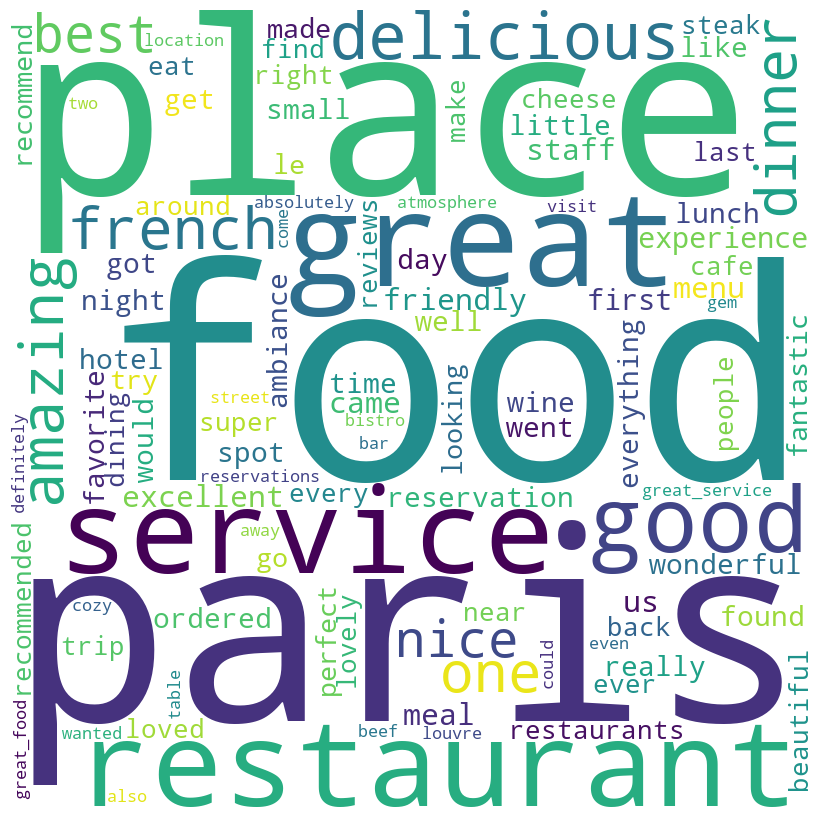

In [114]:
# Création du WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(most_common_words)

# Affichage du WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [128]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize

# Préparation des données pour LDA
# Tokenisation des avis prétraités
texts = [word_tokenize(doc) for doc in review_df['preprocessed_text']]

# Création d'un dictionnaire qui mappe chaque mot à un id unique
dictionary = corpora.Dictionary(texts)

# Filtrage des mots extrêmement rares et trop fréquents pour améliorer la qualité des topics
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Transformation des documents en vecteurs de sac de mots (Bag of Words)
corpus = [dictionary.doc2bow(text) for text in texts]

# Entraînement du modèle LDA
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=6,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Obtenir les topics
topics = lda_model.print_topics(num_words=4)  # Changer le nombre de mots par topic si nécessaire

for topic in topics:
    print(topic)


(0, '0.104*"menu" + 0.072*"like" + 0.068*"night" + 0.060*"found"')
(1, '0.158*"staff" + 0.091*"little" + 0.076*"favorite" + 0.055*"chicken"')
(2, '0.094*"delicious" + 0.078*"service" + 0.075*"amazing" + 0.037*"wine"')
(3, '0.093*"food" + 0.065*"place" + 0.056*"great" + 0.049*"restaurant"')
(4, '0.205*"paris" + 0.098*"one" + 0.083*"dinner" + 0.053*"first"')
(5, '0.048*"us" + 0.045*"came" + 0.038*"get" + 0.033*"ordered"')


In [116]:
pip install pyLDAvis

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/2.6 MB 10.2 MB/s eta 0:00:01
     ----------------- ---------------------- 1.1/2.6 MB 13.9 MB/s eta 0:00:01
     ------------------------------ --------- 2.0/2.6 MB 15.8 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/96.4 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.4 kB ? eta -:--:--
   ---------------------------------------- 96.4/96.4 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Activer pyLDAvis dans Jupyter Notebook (pas nécessaire si vous utilisez JupyterLab ou une autre interface)
pyLDAvis.enable_notebook()

# Préparation des données pour pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Affichage de la visualisation
pyLDAvis.display(lda_display)


In [130]:
from gensim.models import Word2Vec

# Préparation des données pour Word2Vec (tokenisation a déjà été faite)
texts = [text.split() for text in review_df['preprocessed_text']]

# Entraînement du modèle Word2Vec
w2v_model = Word2Vec(texts, vector_size=100, window=5, min_count=1, workers=2)

# Enregistrer le modèle pour une utilisation ultérieure
w2v_model.save("word2vec_model.model")

In [133]:
# Trouver des mots similaires
similar_words = w2v_model.wv.most_similar('food', topn=10)  # Remplacez 'food' par le mot de votre choix
print(similar_words)

[('going_twice', 0.4541531205177307), ('excellent', 0.41266879439353943), ('feta_unbelievably', 0.40307971835136414), ('dining', 0.3934289216995239), ('service', 0.3864805996417999), ('one', 0.38227617740631104), ('french', 0.37393054366111755), ('good', 0.3736700117588043), ('amongst', 0.3640548884868622), ('paris', 0.36249691247940063)]


In [134]:
from sklearn.manifold import TSNE

AttributeError: 'list' object has no attribute 'shape'

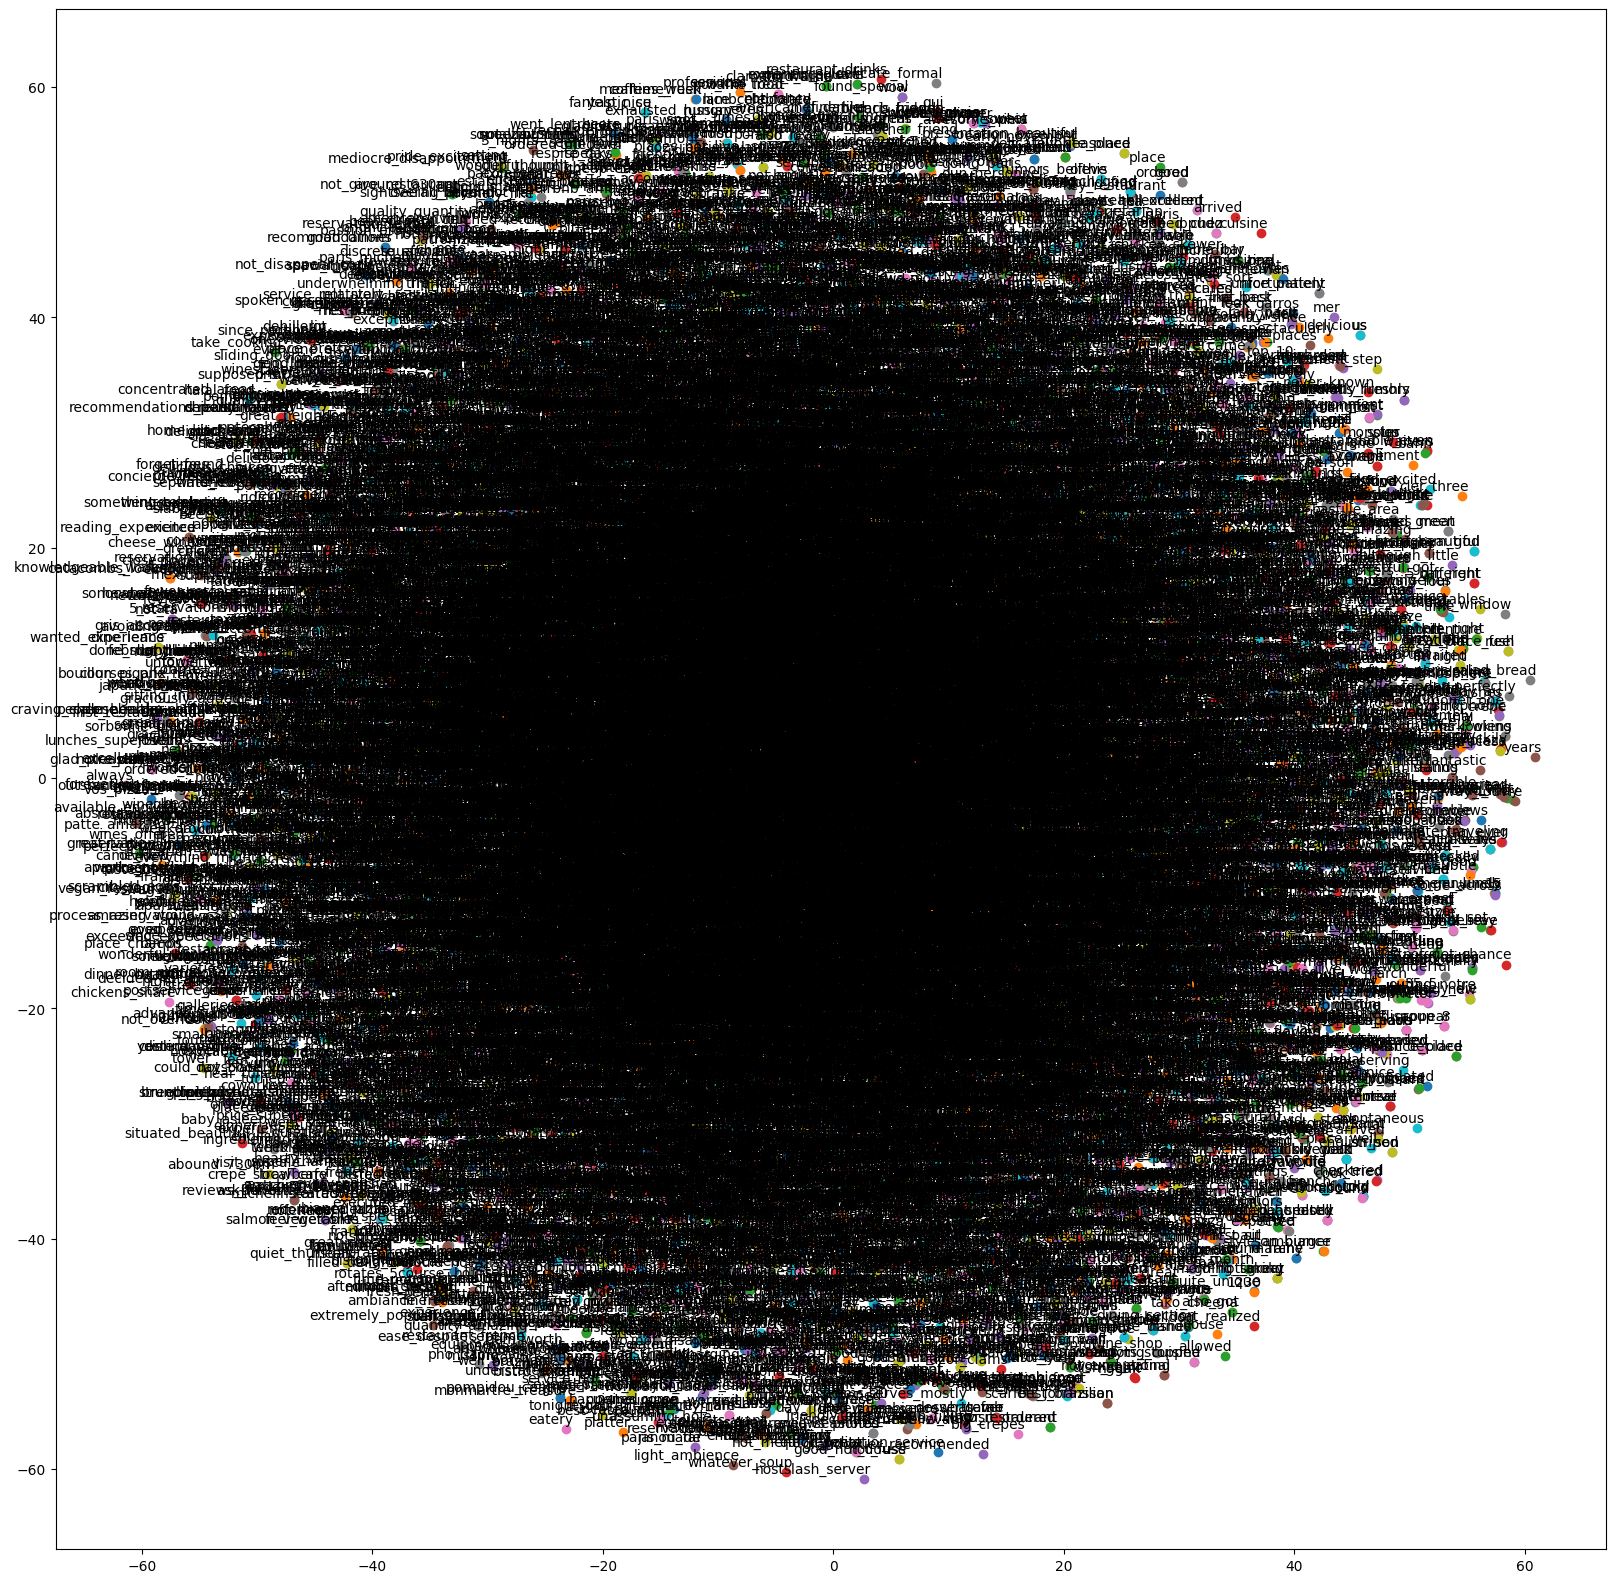

In [136]:
# Récupération des vecteurs de mots du modèle
words = list(w2v_model.wv.index_to_key)
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(20, 20))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [1]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarité cosinus entre les vecteurs de mots
similarity_matrix = cosine_similarity(word_vectors)

# Trouver des mots similaires à un mot donné
def find_similar_words(word, model, top_n=5):
    word_vector = model.wv[word].reshape(1, -1)
    similarities = cosine_similarity(word_vector, model.wv.vectors).flatten()
    similar_indices = similarities.argsort()[-top_n:][::-1]
    similar_words = [(model.wv.index_to_key[i], similarities[i]) for i in similar_indices if model.wv.index_to_key[i] != word]
    return similar_words

# Exemple : Trouver des mots similaires à 'delicious'
print(find_similar_words('present', w2v_model))


NameError: name 'word_vectors' is not defined

In [140]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

def semantic_search(query, model, texts, top_n=5):
    # Tokeniser et calculer la moyenne des vecteurs de mots pour la requête
    query_tokens = query.split()
    query_vector = average_word_vectors(query_tokens, model, set(model.wv.index_to_key), model.vector_size)
    
    # Calculer la moyenne des vecteurs de mots pour chaque document
    docs_vectors = [average_word_vectors(text.split(), model, set(model.wv.index_to_key), model.vector_size) for text in texts]
    
    # Calculer la similarité cosinus entre la requête et chaque document
    similarities = cosine_similarity([query_vector], docs_vectors).flatten()
    similar_indices = similarities.argsort()[-top_n:][::-1]
    similar_texts = [(texts[i], similarities[i]) for i in similar_indices]
    
    return similar_texts

# Exemple de recherche sémantique
query = "great food and service"
print(semantic_search(query, w2v_model, review_df['preprocessed_text'].tolist()))

[('great restaurant easy find great service french food asian twist dishes good cocktails great_restaurant restaurant_easy easy_find find_great great_service service_french french_food food_asian asian_twist twist_dishes dishes_good good_cocktails', 0.8204933446580132), ('fantastic little restaurant great food lovely service fantastic_little little_restaurant restaurant_great great_food food_lovely lovely_service', 0.8071401684408177), ('amazing bar style restaurant service great look big butter good food dessert cheese great amazing_bar bar_style style_restaurant restaurant_service service_great great_look look_big big_butter butter_good good_food food_dessert dessert_cheese cheese_great', 0.799564751524585), ('great place family last night paris food wine great service excellent ambiance candle light nice touch great_place place_family family_last last_night night_paris paris_food food_wine wine_great great_service service_excellent excellent_ambiance ambiance_candle candle_light lig